### Prepare phenoype for subtype analysis : gambling task

- Build a scrubbing file to be used on subtype analysis for gambling task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [4]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("gambRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess1_gambRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("gambLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess1_gambLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728,HCP100206
16,HCP100307_sess1_gambRL,0.0,253.0,0.102024,0.102024,HCP100307
30,HCP100408_sess1_gambRL,37.0,216.0,0.143025,0.122936,HCP100408
44,HCP100610_sess1_gambRL,0.0,253.0,0.154041,0.154041,HCP100610
58,HCP101006_sess1_gambRL,0.0,253.0,0.118379,0.118379,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565,HCP100206
17,HCP100307_sess1_gambLR,0.0,253.0,0.086469,0.086469,HCP100307
31,HCP100408_sess1_gambLR,0.0,253.0,0.142040,0.142040,HCP100408
45,HCP100610_sess1_gambLR,0.0,253.0,0.168082,0.168082,HCP100610
59,HCP101006_sess1_gambLR,0.0,253.0,0.133149,0.133149,HCP101006


In [5]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
2,HCP100206_sess1_gambRL,0.081728,0.081728,HCP100206
16,HCP100307_sess1_gambRL,0.102024,0.102024,HCP100307
30,HCP100408_sess1_gambRL,0.143025,0.122936,HCP100408
44,HCP100610_sess1_gambRL,0.154041,0.154041,HCP100610
58,HCP101006_sess1_gambRL,0.118379,0.118379,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
3,HCP100206_sess1_gambLR,0.098565,0.098565,HCP100206
17,HCP100307_sess1_gambLR,0.086469,0.086469,HCP100307
31,HCP100408_sess1_gambLR,0.142040,0.142040,HCP100408
45,HCP100610_sess1_gambLR,0.168082,0.168082,HCP100610
59,HCP101006_sess1_gambLR,0.133149,0.133149,HCP101006


In [6]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [7]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess1_gambRL,0.081728,0.081728,HCP100206,HCP100206_sess1_gambLR,0.098565,0.098565
1,HCP100307_sess1_gambRL,0.102024,0.102024,HCP100307,HCP100307_sess1_gambLR,0.086469,0.086469
2,HCP100408_sess1_gambRL,0.143025,0.122936,HCP100408,HCP100408_sess1_gambLR,0.142040,0.142040
3,HCP100610_sess1_gambRL,0.154041,0.154041,HCP100610,HCP100610_sess1_gambLR,0.168082,0.168082
4,HCP101006_sess1_gambRL,0.118379,0.118379,HCP101006,HCP101006_sess1_gambLR,0.133149,0.133149


In [8]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [9]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.081728,0.081728,0.098565,0.098565
1,HCP100307,0.102024,0.102024,0.086469,0.086469
2,HCP100408,0.143025,0.122936,0.142040,0.142040
3,HCP100610,0.154041,0.154041,0.168082,0.168082
4,HCP101006,0.118379,0.118379,0.133149,0.133149


In [10]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_gambling.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.081728,0.081728,0.098565,0.098565,0.090146,0.090146
1,HCP100307,0.102024,0.102024,0.086469,0.086469,0.094247,0.094247
2,HCP100408,0.143025,0.122936,0.142040,0.142040,0.132488,0.142533
3,HCP100610,0.154041,0.154041,0.168082,0.168082,0.161061,0.161061
4,HCP101006,0.118379,0.118379,0.133149,0.133149,0.125764,0.125764


In [12]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,854.000000,854.000000,856.000000,856.000000,856.000000,856.000000
mean,0.130542,0.122677,0.134864,0.125383,0.124085,0.132748
std,0.049774,0.034207,0.052500,0.035848,0.034127,0.048350
min,0.058725,0.058725,0.062104,0.060690,0.060319,0.064175
25%,0.098672,0.097106,0.101608,0.099233,0.097985,0.100015
50%,0.119669,0.115918,0.121414,0.117181,0.116538,0.121118
75%,0.148327,0.141970,0.154542,0.146365,0.143401,0.152226
max,0.761914,0.281325,0.680475,0.295472,0.286930,0.560796


In [13]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

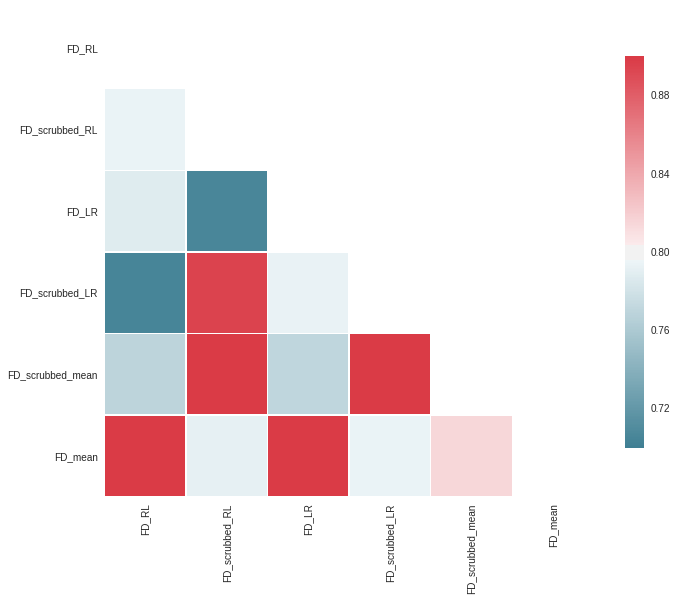

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

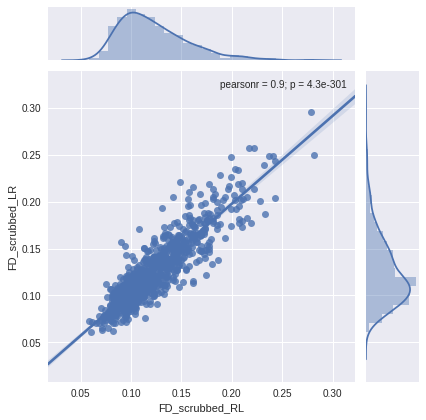

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

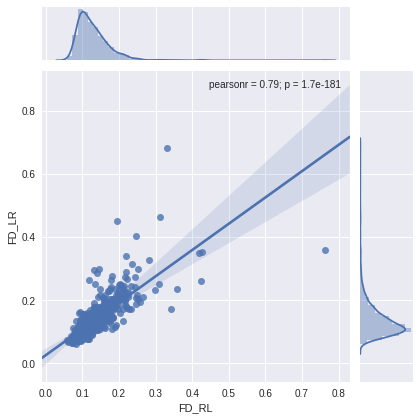

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [18]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [20]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI']],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,M,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [21]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [22]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject       931
Age_in_Yrs    931
Gender        931
Twin_Stat     931
Zygosity      931
Mother_ID     931
BMI           931
Cluster_1     931
Cluster_2     931
Cluster_3     931
Cluster_4     931
Cluster_5     931
Cluster_6     931
Cluster_7     931
Cluster_8     931
Cluster_9     931
dtype: int64

In [23]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,1,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [25]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [26]:
merged_pheno_scrub.count()

                    856
FD_RL               854
FD_scrubbed_RL      854
FD_LR               856
FD_scrubbed_LR      856
FD_scrubbed_mean    856
FD_mean             856
Subject             826
Age_in_Yrs          826
Gender              826
Twin_Stat           826
Zygosity            826
Mother_ID           826
BMI                 826
Cluster_1           826
Cluster_2           826
Cluster_3           826
Cluster_4           826
Cluster_5           826
Cluster_6           826
Cluster_7           826
Cluster_8           826
Cluster_9           826
dtype: int64

In [27]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [28]:
merged_pheno_scrub_clean.count()

                    824
FD_RL               824
FD_scrubbed_RL      824
FD_LR               824
FD_scrubbed_LR      824
FD_scrubbed_mean    824
FD_mean             824
Subject             824
Age_in_Yrs          824
Gender              824
Twin_Stat           824
Zygosity            824
Mother_ID           824
BMI                 824
Cluster_1           824
Cluster_2           824
Cluster_3           824
Cluster_4           824
Cluster_5           824
Cluster_6           824
Cluster_7           824
Cluster_8           824
Cluster_9           824
dtype: int64

In [29]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100206,0.081728,0.081728,0.098565,0.098565,0.090146,0.090146,HCP100206,27.0,1.0,...,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
1,HCP100307,0.102024,0.102024,0.086469,0.086469,0.094247,0.094247,HCP100307,27.0,2.0,...,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
2,HCP100408,0.143025,0.122936,0.142040,0.142040,0.132488,0.142533,HCP100408,33.0,1.0,...,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
3,HCP100610,0.154041,0.154041,0.168082,0.168082,0.161061,0.161061,HCP100610,27.0,1.0,...,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983
4,HCP101006,0.118379,0.118379,0.133149,0.133149,0.125764,0.125764,HCP101006,35.0,2.0,...,30.27,0.037814,-0.884476,0.444130,-0.310122,-0.382892,-0.364271,-0.755113,0.459547,-0.740855
5,HCP101107,0.114704,0.086304,0.077594,0.077594,0.081949,0.096149,HCP101107,22.0,1.0,...,21.13,0.202495,0.226738,-0.559673,0.350452,1.342476,0.021861,-0.278376,0.342744,-0.562346
6,HCP101309,0.083014,0.083014,0.082493,0.082493,0.082753,0.082753,HCP101309,29.0,1.0,...,22.20,-1.055772,-0.784829,-0.488804,0.396601,-0.311712,0.270656,-0.669878,-0.148125,-0.599108
7,HCP101410,0.145591,0.145591,0.146281,0.146281,0.145936,0.145936,HCP101410,29.0,1.0,...,24.27,-0.213366,0.038804,0.648966,0.388945,-0.441041,-0.175267,-0.377717,-0.478595,-0.649063
8,HCP101915,0.097097,0.097097,0.100370,0.095424,0.096261,0.098734,HCP101915,35.0,2.0,...,20.42,-0.838038,-0.376029,-0.917120,1.173695,-0.365245,1.127413,-0.649360,-0.357989,-0.309757
9,HCP102008,0.104182,0.104182,0.142362,0.113332,0.108757,0.123272,HCP102008,24.0,1.0,...,31.42,-0.101973,0.951127,0.735433,0.654455,0.493727,0.160656,0.058103,-0.159212,0.394972


In [30]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_gambling_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_gambling.csv"), index=False)